# GOAL
To train the model on california housing dataset and then use it predict.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
np.set_printoptions(precision=2)

## Setup and Data Loading
- Import necessary libraries (NumPy, Matplotlib).
- Load the California Housing dataset using the scikit-learn helper function.
- Select a single feature (e.g., MedInc) for X and the target (PRICE) for y. Starting with one feature allows us to focus on the core algorithm implementation.

In [2]:
housing = fetch_california_housing()

In [3]:
X_train = housing.data
y = housing.target

In [4]:
print("shape of X_train :", X_train.shape)
print("shape of y :",y.shape)

shape of X_train : (20640, 8)
shape of y : (20640,)


In [5]:
print("First 5 values of X:\n", X_train[:5])
print("First 5 values of y:\n", y[:5])

First 5 values of X:
 [[ 8.33e+00  4.10e+01  6.98e+00  1.02e+00  3.22e+02  2.56e+00  3.79e+01
  -1.22e+02]
 [ 8.30e+00  2.10e+01  6.24e+00  9.72e-01  2.40e+03  2.11e+00  3.79e+01
  -1.22e+02]
 [ 7.26e+00  5.20e+01  8.29e+00  1.07e+00  4.96e+02  2.80e+00  3.79e+01
  -1.22e+02]
 [ 5.64e+00  5.20e+01  5.82e+00  1.07e+00  5.58e+02  2.55e+00  3.79e+01
  -1.22e+02]
 [ 3.85e+00  5.20e+01  6.28e+00  1.08e+00  5.65e+02  2.18e+00  3.79e+01
  -1.22e+02]]
First 5 values of y:
 [4.53 3.58 3.52 3.41 3.42]


In [6]:
features = housing.feature_names

In [7]:
def plot_all_features(X,y,features,ax,*,c="tab:blue"):    
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            k = 4 * j + i
            ax[j][i].scatter(X[:,k],y,c=c)
            ax[j][i].set_xlabel(features[k])
        ax[j][0].set_ylabel("Price")
        

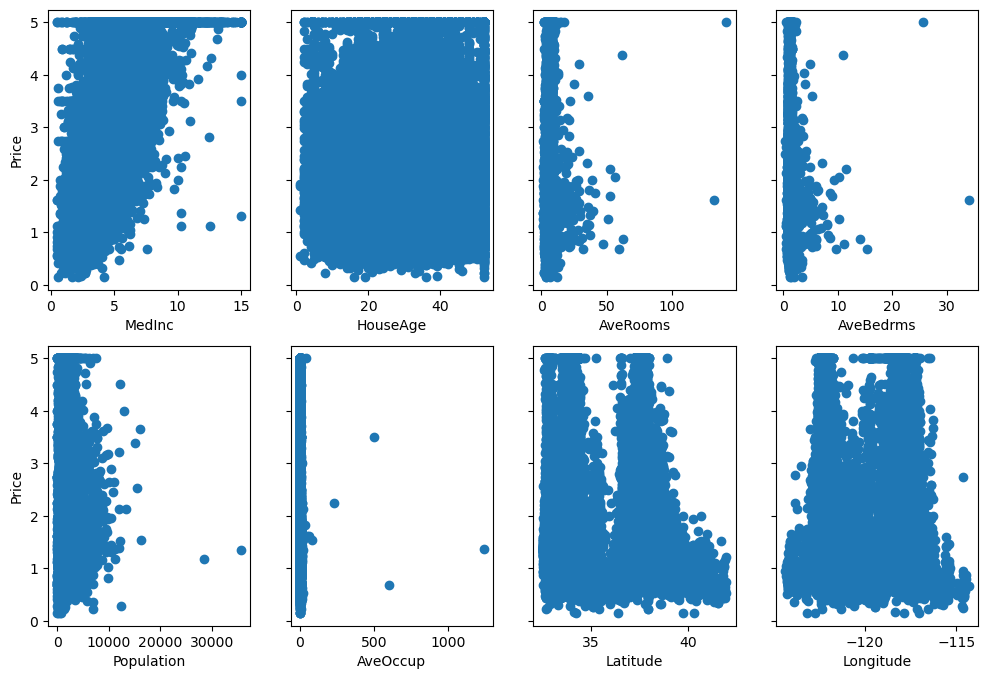

In [8]:
fig,ax=plt.subplots(2, 4,figsize=(12, 8), sharey=True)
plot_all_features(X_train,y,features,ax)
plt.show()

# Data Preparation: Feature Scaling

- Implement a function for Z-score normalization.
- Scale the input feature X to create a new array, X_scaled.
- Visualize the scaled data to confirm the transformation was successful.

In [9]:
def z_score_norm(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean)/std
    

In [10]:
X_scaled = z_score_norm(X_train)

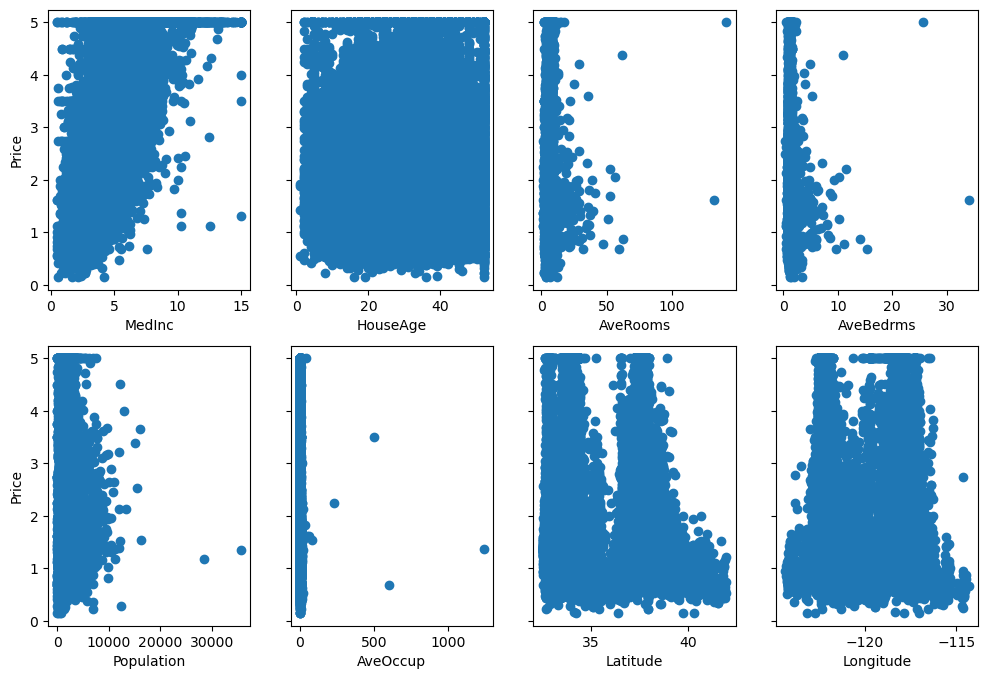

In [11]:
fig,ax=plt.subplots(2, 4,figsize=(12, 8), sharey=True)
plot_all_features(X_train,y,features,ax)
plt.show()

# Model Implementation
- Create the `compute_cost` function to calculate the Mean Squared Error.
- Create the `compute_gradient` function to calculate the gradients for w and b.
- Create the main `gradient_descent` function that iteratively updates the parameters.

In [12]:
def compute_cost(X,y,w,b):
    m = X.shape[0]

    f_wb = np.dot(X,w) + b
    err = (f_wb - y) ** 2

    cost = np.sum(err)

    cost /= 2 * m
        
    return cost

def compute_gradient(X,y,w,b):
    m,n = X.shape

    f_wb = np.dot(X,w) + b
    err = f_wb - y
    dj_db = np.sum(err)

    dj_dw = np.dot(X.T,err)

    dj_dw /= m
    dj_db /= m

    return dj_dw,dj_db


def gradient_descent(x,y,w_in,b_in,num_iter,alpha):
    w = w_in
    b = b_in

    J_his = []
    P_his = []

    for i in range(num_iter):
        cost = compute_cost(x,y,w,b)
        J_his.append(cost)
        P_his.append([w,b])

        if i % (num_iter / 10) == 0:
            print(f'Cost after iteration {i} : {cost} for params [w,b] : {w,b}')

        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w,b,J_his,P_his

# Model Training

- Initialize parameters w and b.
- Set hyperparameters (iterations, learning rate alpha).
- Run the gradient_descent function on the scaled data (X_scaled, y) to learn the final parameters.

In [13]:
w_in = np.zeros(X_scaled.shape[1])
b_in = 0
iterations = 10000
alpha = 1e-3
w,b,J_his,P_his = gradient_descent(X_scaled,y,w_in,b_in,iterations,alpha)
print("final w,b after training", w, b)

Cost after iteration 0 : 2.8052415994936264 for params [w,b] : (array([0., 0., 0., 0., 0., 0., 0., 0.]), 0)
Cost after iteration 1000 : 0.8791632117880674 for params [w,b] : (array([-0.19, -0.16, -0.19, -0.19,  0.27, -0.19, -0.15, -0.33]), np.float64(0.6995448197623066))
Cost after iteration 2000 : 0.7253938388420578 for params [w,b] : (array([-0.26, -0.22, -0.26, -0.27,  0.14, -0.27, -0.22, -0.46]), np.float64(0.9834475527716674))
Cost after iteration 3000 : 0.6829127564652172 for params [w,b] : (array([-0.3 , -0.25, -0.3 , -0.31,  0.06, -0.31, -0.25, -0.53]), np.float64(1.1329527788303662))
Cost after iteration 4000 : 0.6711705022169924 for params [w,b] : (array([-0.32, -0.26, -0.32, -0.34,  0.03, -0.33, -0.27, -0.57]), np.float64(1.2118436042209817))
Cost after iteration 5000 : 0.6679185965012429 for params [w,b] : (array([-0.33, -0.27, -0.33, -0.35,  0.01, -0.35, -0.28, -0.59]), np.float64(1.2536225668943326))
Cost after iteration 6000 : 0.6670118055398039 for params [w,b] : (array

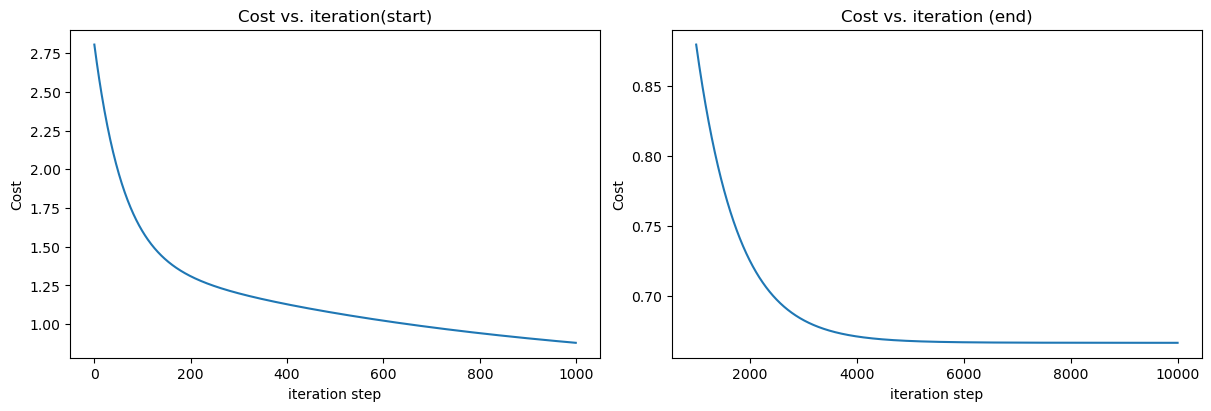

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_his[:1000])
ax2.plot(1000 + np.arange(len(J_his[1000:])), J_his[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

[2.09 2.05 2.08 ... 2.08 2.09 2.07]


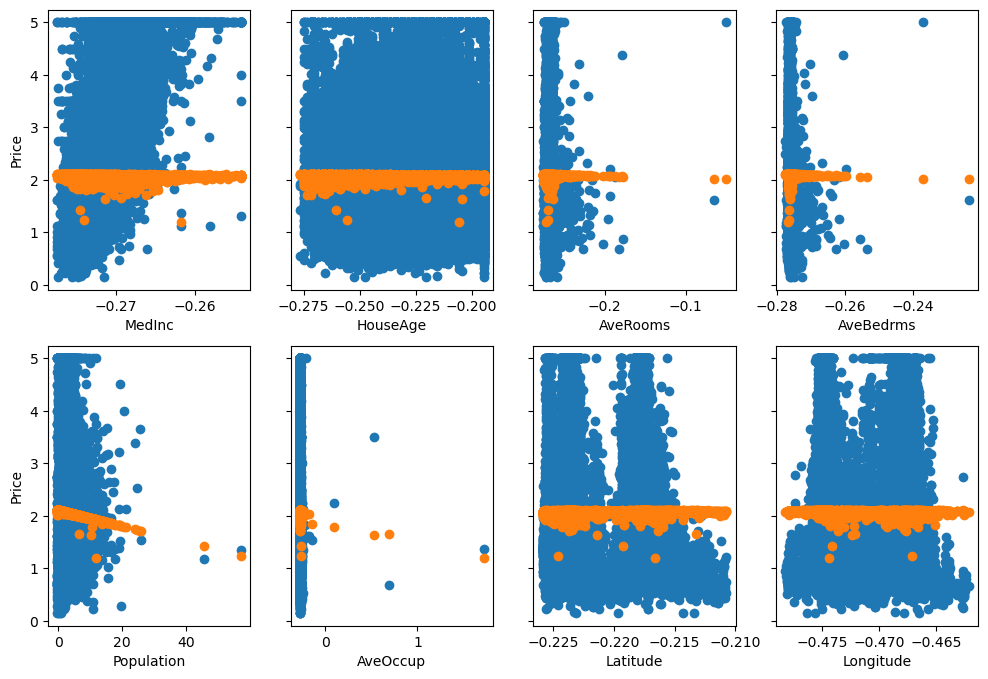

In [15]:
fig,ax=plt.subplots(2, 4,figsize=(12, 8), sharey=True)
plot_all_features(X_scaled,y,features,ax)
y_predict = X_scaled@w + b
print(y_predict)
plot_all_features(X_scaled,y_predict, features, ax,c="tab:orange")
plt.show()